In [1]:
import pandas as pd
import re

# Leggi il file di testo come una serie di blocchi
with open('results.txt', 'r') as file:
	blocks = file.read().split('==============================')

# Inizializza una lista per contenere i risultati
results = []

# Estrai le informazioni rilevanti da ciascun blocco
for block in blocks:
	pattern = r"(\w+) vs (\w+) Final results:\s+(\w+)\s+Score: (\d+), Won: (\d+), Lost: (\d+), Draw: (\d+), Error: (\d+)\s+(\w+)\s+Score: (\d+), Won: (\d+), Lost: (\d+), Draw: (\d+), Error: (\d+)"
	match = re.search(pattern, block)
	if match:
		player1, opponent, player2, score1, won1, lost1, draw1, error1, player3, score2, won2, lost2, draw2, error2 = match.groups()
		results.append([player1, opponent, score1, won1, lost1, draw1, error1])
		results.append([opponent, player1, score2, won2, lost2, draw2, error2])
	else:
		print(f"No match found in block:\n{block}\n")

# Crea un DataFrame pandas
df = pd.DataFrame(results, columns=['Player', 'Opponent', 'Score', 'Won', 'Lost', 'Draw', 'Error'])

# Converte le colonne numeriche al tipo di dati corretto
for col in ['Score', 'Won', 'Lost', 'Draw', 'Error']:
	df[col] = df[col].astype(int)

# Raggruppa i risultati per giocatore e avversario
grouped = df.groupby(['Player', 'Opponent']).sum()

print(grouped)

No match found in block:


No match found in block:
 


No match found in block:
 BOB42 depth and time management


No match found in block:
 BOB42 += combo avversario


No match found in block:
 BOB42 bonus combo manca 1 pedina per vincere/perdere


No match found in block:
 BOB42 depth-- a 3/4 del tempo

No match found in block:
 throw new TimeoutException(); into if Timeout statement alpha-beta


No match found in block:
 alpha/beta 4/5 & selcol 5/6


No match found in block:
 ## IN CASE GO RANDOM AND 4/5 BREAK AND ALPHA BETA


No match found in block:
 Using LAST_TIME const as 3/4 or /2 for >=40


No match found in block:
 
Bob42 vs Hope Final results: 
Bob42	 Score: 70, Won: 10, Lost: 18, Draw: 40, Error: 2  [in 50 50 10]
Hope	 Score: 100, Won: 18, Lost: 10, Draw: 40, Error: 0  


No match found in block:
 N >= 40 ? TIMEOUT/(N >= 50? 3 : 2) : 3*TIMEOUT/4; ! dovrebbe fixare error in 50 50 10


                         Score   Won  Lost  Draw  Error
Player      Opponent             

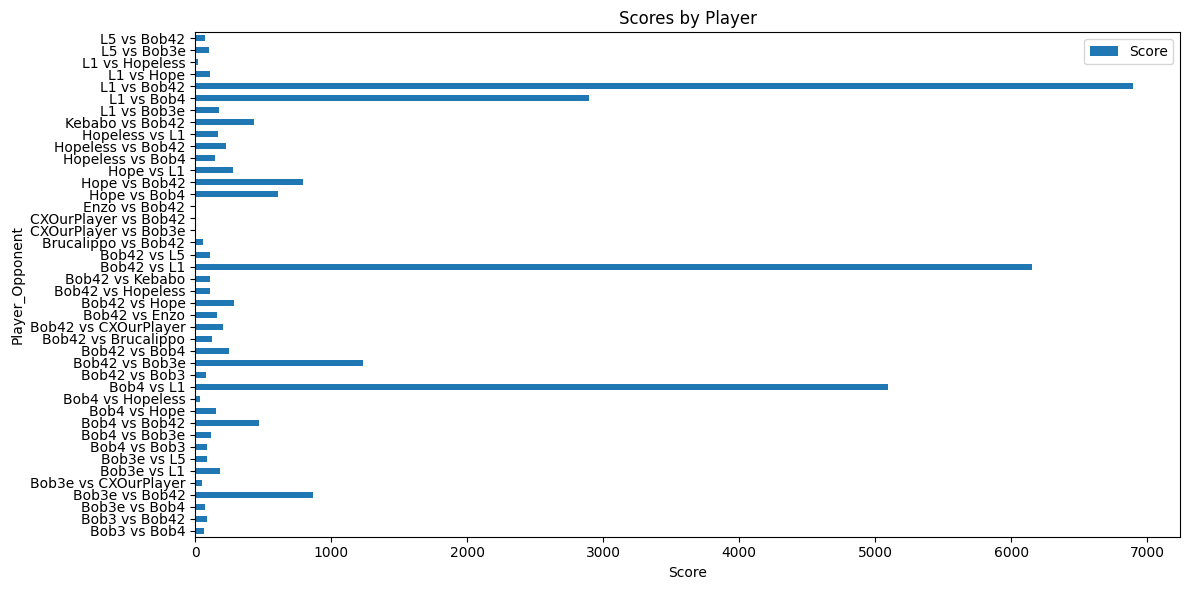

In [2]:
import matplotlib.pyplot as plt

# Assuming 'grouped' is your DataFrame
grouped = grouped.reset_index()  # Reset index to use 'Player' and 'Opponent' in the plot

# Create a new column for Player and Opponent combined (for display on x-axis)
grouped['Player_Opponent'] = grouped['Player'] + ' vs ' + grouped['Opponent']

# Plotting
grouped.plot(x='Player_Opponent', y='Score', kind='barh', figsize=(12, 6))
plt.title('Scores by Player')
plt.xlabel('Score')
plt.tight_layout()
plt.show()

C:\Users\alice\AppData\Local\Temp\ipykernel_19584\1496231351.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bob4['Cumulative Score'] = bob4['Score'].cumsum()
C:\Users\alice\AppData\Local\Temp\ipykernel_19584\1496231351.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bob42['Cumulative Score'] = bob42['Score'].cumsum()


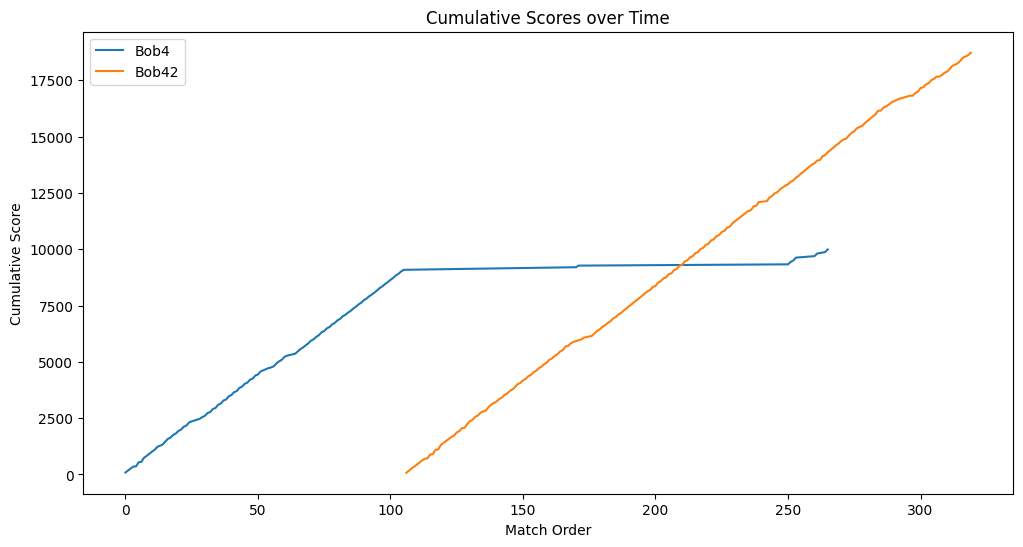

In [3]:
# Filtra il DataFrame per i giocatori Bob4 e Bob42
bob4 = df[(df['Player'] == 'Bob4') | (df['Opponent'] == 'Bob4')]
bob42 = df[(df['Player'] == 'Bob42') | (df['Opponent'] == 'Bob42')]

# Calcola il punteggio cumulativo per ogni giocatore
bob4['Cumulative Score'] = bob4['Score'].cumsum()
bob42['Cumulative Score'] = bob42['Score'].cumsum()

# Crea il grafico
plt.figure(figsize=(12, 6))
plt.plot(bob4.index, bob4['Cumulative Score'], label='Bob4')
plt.plot(bob42.index, bob42['Cumulative Score'], label='Bob42')
plt.title('Cumulative Scores over Time')
plt.xlabel('Match Order')
plt.ylabel('Cumulative Score')
plt.legend()
plt.show()

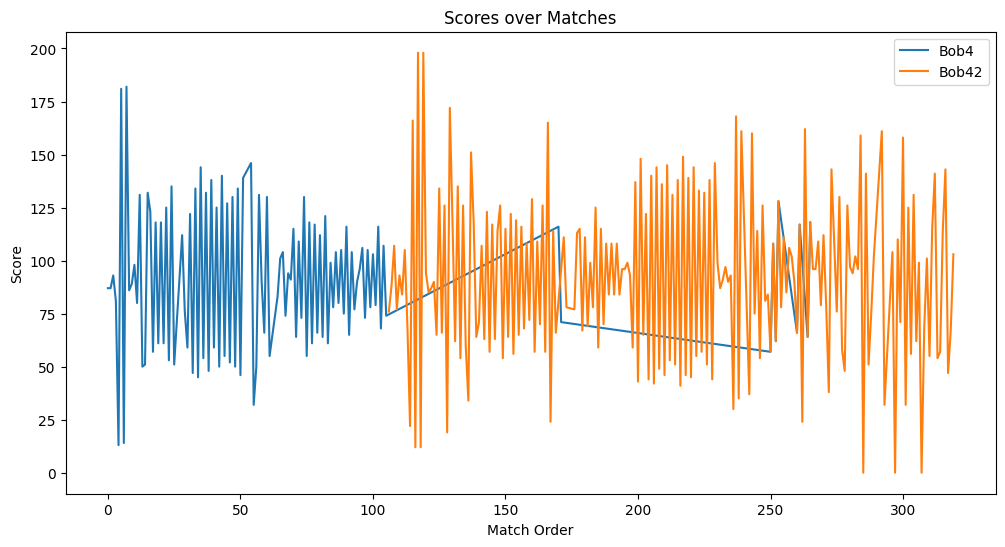

In [4]:
# Filtra il DataFrame per i giocatori Bob4 e Bob42
bob4 = df[(df['Player'] == 'Bob4') | (df['Opponent'] == 'Bob4')]
bob42 = df[(df['Player'] == 'Bob42') | (df['Opponent'] == 'Bob42')]

# Crea il grafico
plt.figure(figsize=(12, 6))
plt.plot(bob4.index, bob4['Score'], label='Bob4')
plt.plot(bob42.index, bob42['Score'], label='Bob42')
plt.title('Scores over Matches')
plt.xlabel('Match Order')
plt.ylabel('Score')
plt.legend()
plt.show()

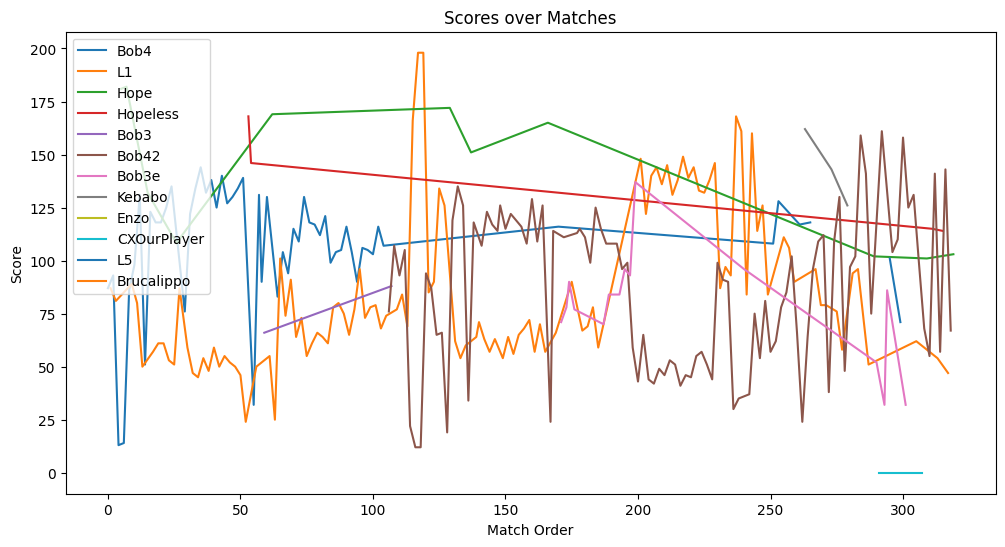

In [5]:
import matplotlib.pyplot as plt

# Crea il grafico
plt.figure(figsize=(12, 6))
for player in df['Player'].unique():
	player_data = df[df['Player'] == player]
	plt.plot(player_data.index, player_data['Score'], label=player)
plt.title('Scores over Matches')
plt.xlabel('Match Order')
plt.ylabel('Score')
plt.legend()
plt.show()

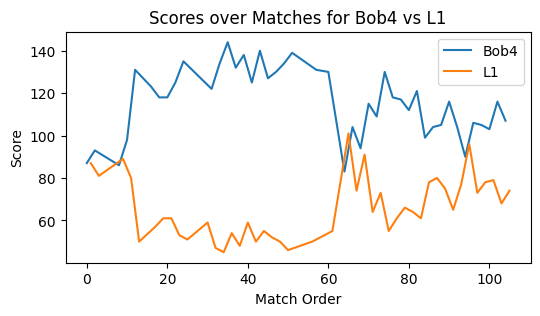

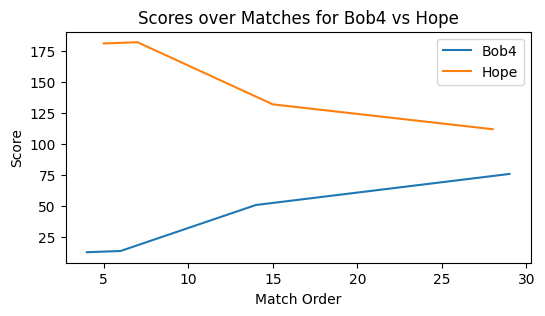

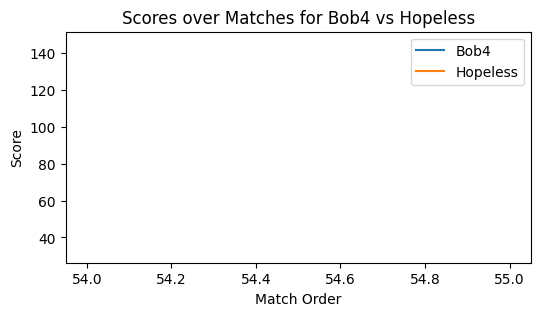

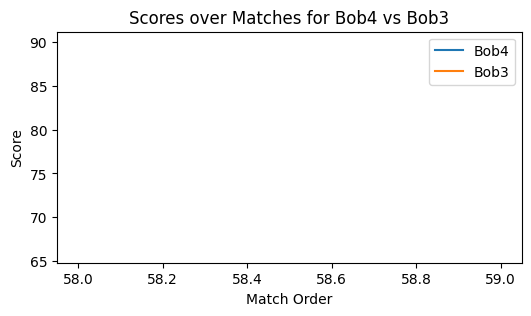

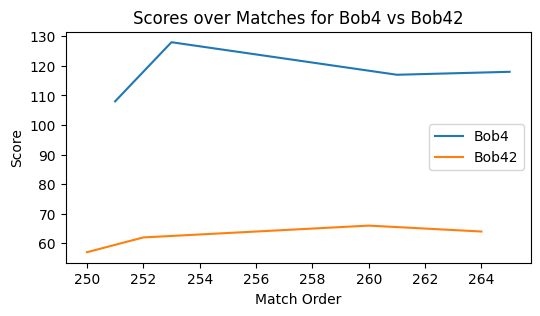

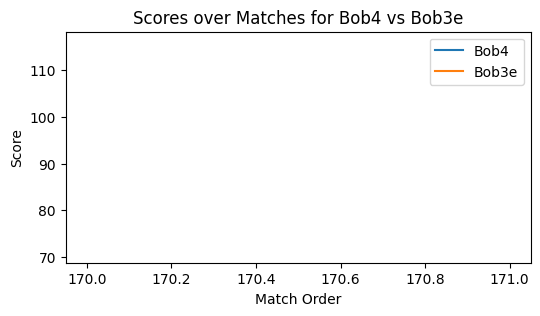

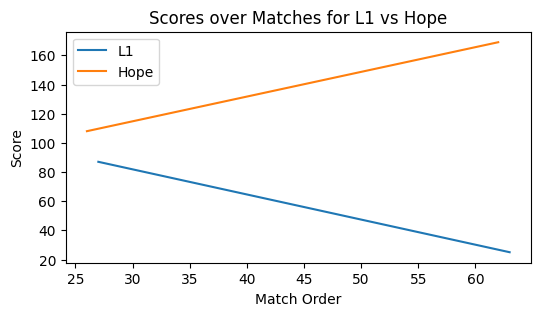

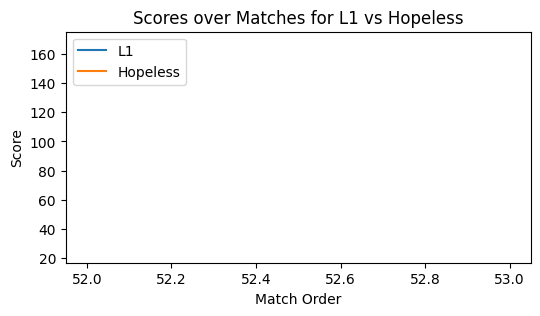

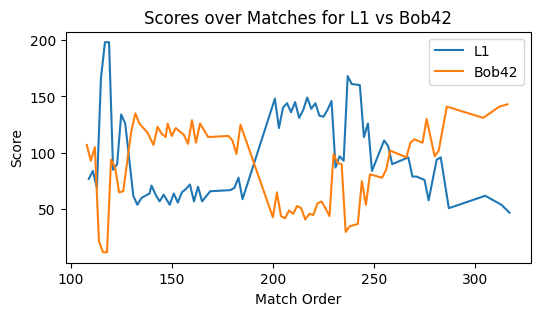

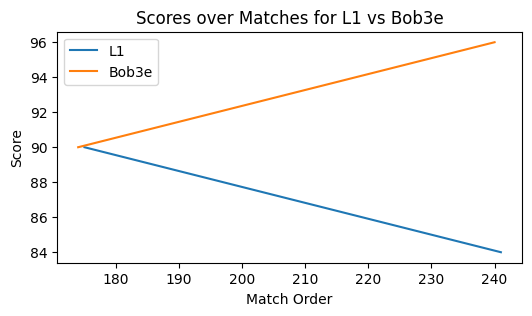

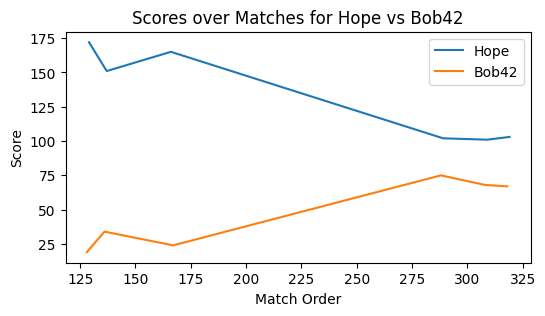

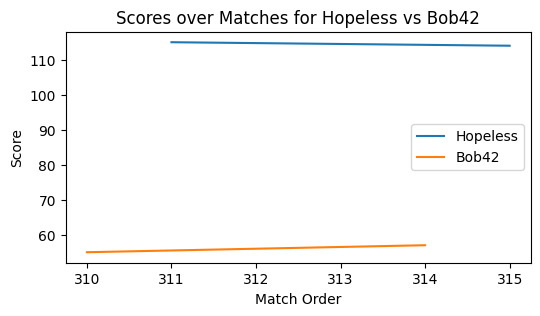

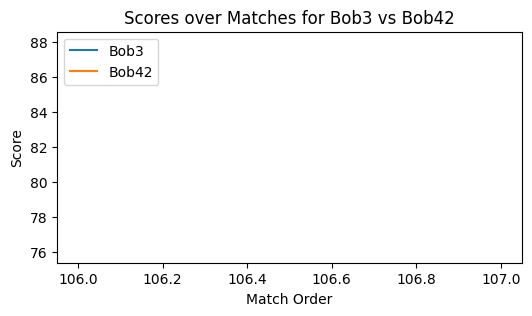

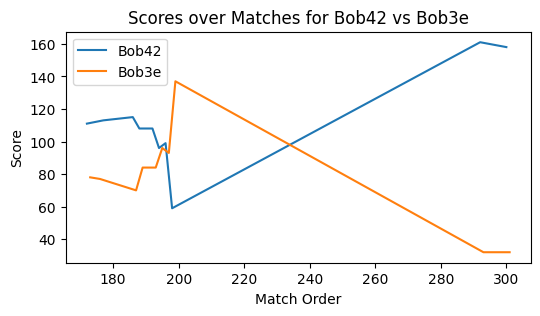

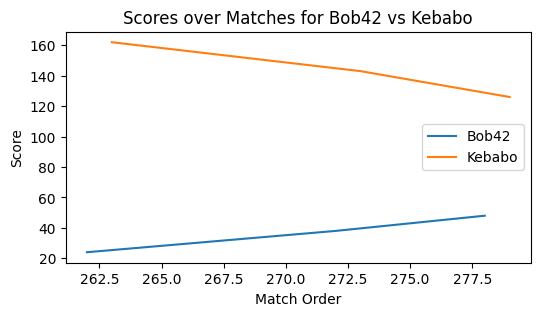

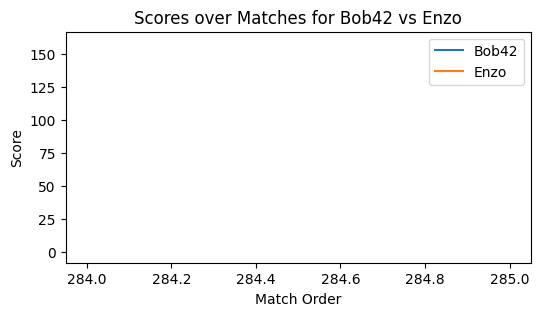

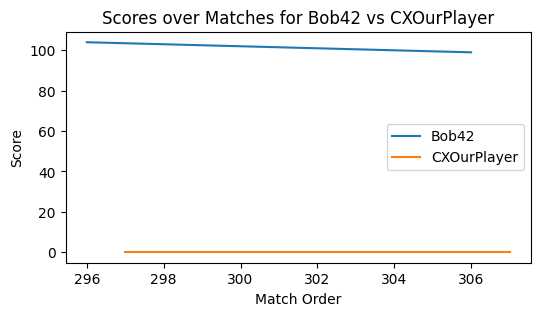

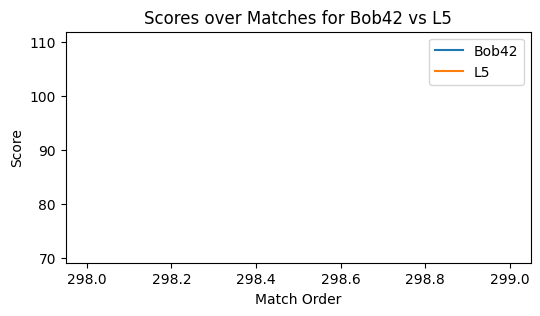

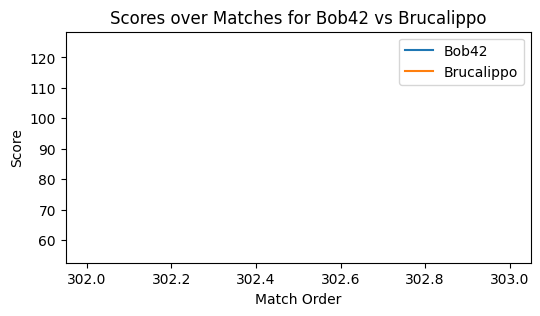

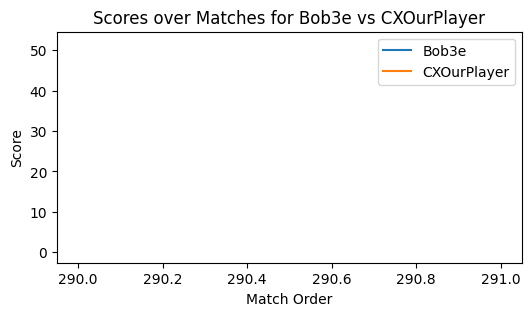

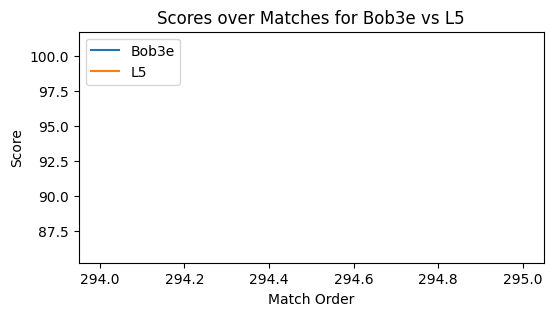

In [6]:
import matplotlib.pyplot as plt
from itertools import combinations

# Ottieni tutte le combinazioni uniche di giocatori
players = df['Player'].unique()
player_combinations = list(combinations(players, 2))

for player1, player2 in player_combinations:
    # Filtra il DataFrame per le partite tra i due giocatori
    match_data = df[((df['Player'] == player1) & (df['Opponent'] == player2)) | 
                    ((df['Player'] == player2) & (df['Opponent'] == player1))]

    # Se non ci sono partite tra questi due giocatori, continua con la prossima combinazione
    if match_data.empty:
        continue

    # Crea il grafico
    plt.figure(figsize=(6, 3))
    
    # Traccia i punteggi per ogni giocatore
    for player in [player1, player2]:
        player_data = match_data[match_data['Player'] == player]
        plt.plot(player_data.index, player_data['Score'], label=player)
    
    plt.title(f'Scores over Matches for {player1} vs {player2}')
    plt.xlabel('Match Order')
    plt.ylabel('Score')
    plt.legend()
    plt.show()